<div style="border-radius: 10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size: 100%; text-align: left">
    <font size="2px" color="#000000">
        <h2>Project Title: Sprint 2 - Major Depression Disorder Modelling</h2>
        <p>Author: Kouyu (Coco) Yang</p>  
        <p>Date Filed: Nov 9th, 2023</p>  
        <p>Contact: <a href="mailto:cocoyang526@gmail.com">cocoyang526@gmail.com</a></p>  
    </font>
</div>

## **Table of Contents**

<div style="border-radius: 10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size: 100%; text-align: left">
<font size="2px" color="#000000">
<a href="#part-1-project-introduction">Part 1 Project Introduction</a> <br>
    
<a href="#part-2-data-preprocessing">Part 2 Data Preprocessing</a> <br>
<a href="#2.1-correlation--p-value">2.1 Correlation & P-value</a> <br>
<a href="#2.2-check-colinearity">2.2 Check Colinearity</a> <br>
    
<a href="#part-3-multinomial-logistic-regression">Part 3 Multinomial Logistic Regression</a> <br>
<a href="#3.1-baseline-model">3.1 Baseline Model</a> <br>
<a href="#3.2-apply-scaler">3.2 Apply Scaler</a> <br>
<a href="#3.3-pca">3.3 PCA</a> <br>
<a href="#3.4-parameter-tuning">3.4 Parameter Tuning</a> <br>
<a href="#3.5-model-evaluation">3.5 Model Evaluation</a> <br>
    
<a href="#part-4-random-forest">Part 4 Random Forest</a> <br>
<a href="#4.1-data-preprocessing">4.1 Data Preprocessing</a> <br>
<a href="#4.2-baseline-model">4.2 Baseline Model</a> <br>
<a href="#4.3-hyperparameter-tuning">4.3 Hyperparameter Tuning</a> <br>
<div>

### **Part 1 Project Introduction** 

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000">  


In this notebook, we dive into predictive modeling for the Depression target column, employing two key models. We start with a **Multinomial Logistic Regression**, exploring its baseline and enhanced versions through scaling, PCA, and hyperparameter tuning. Following this, we introduce a **Random Forest**, examining both its baseline performance and the outcomes of hyperparameter tuning. To evaluate the models, we use standard metrics like accuracy rates and Confusion Matrix. This notebook is a crucial segment of our capstone, offering insights into the predictive capabilities of our models and the intricate connection between household factors and mental well-being.

<div>

In [87]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
#read the data
df = pd.read_csv('/Users/kouyuyang/Brainstation/Capstone/Sprint 2/Feature Engineering Data.csv')

#sanity check
df.head()                 

Education  Total People  Total Children  Income  Food Spend  \
0        4.0             2               0     7.0       200.0   
1        3.0             1               0     4.0       200.0   
2        4.0             1               0     6.0        65.0   
3        2.0             4               1     0.0       200.0   
4        4.0             2               0     6.0       300.0   

   Medical Shortage  Depression_encoded  Anxiety_encoded  Age Generation  \
0                 0                   0                1             1.0   
1                 0                   0                0             3.0   
2                 0                   1                1             1.0   
3                 0                   2                2             2.0   
4                 0                   0                0             1.0   

   Work Loss_No  ...  Accommodation_Rented  Food Supply_Enough Food  \
0             1  ...                     0                        1   
1             0  ...                     0                        1   
2             1  ...                     0                        1   
3             1  ...                     1                        0   
4             1  ...                     1                        1   

   Food Supply_Often Not Enough  Food Supply_Sometimes Not Enough  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 1   
4                             0                                 0   

   Active Duty_No  Active Duty_On Active Duty  \
0               1                           0   
1               1                           0   
2               1                           0   
3               1                           0   
4               1                           0   

   Active Duty_Spouse On Active Duty  Veteran_No  Veteran_Served Active Duty  \
0                                  0           1                           0   
1                                  0           1                           0   
2                                  0           1                           0   
3                                  0           1                           0   
4                                  0           1                           0   

   Veteran_Spouse Served Active Duty  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 56 columns]

In [89]:
#check the shape
df.shape

(54584, 56)

In [90]:
#check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

### **Part 2 Data Preprocessing** 

#### **2.1 Correlation & P-value**

In [91]:
#Assign Values to X and y
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

In [92]:
#check the shape
print(X.shape)
print(y.shape)

(54584, 55)
(54584,)


In [93]:
#get the correlation
corr_df = X.corr()
corr_df

Education  Total People  Total Children  \
Education                             1.000000     -0.036554       -0.013095   
Total People                         -0.036554      1.000000        0.779760   
Total Children                       -0.013095      0.779760        1.000000   
Income                                0.325305      0.162639        0.102283   
Food Spend                           -0.016482      0.353284        0.297099   
Medical Shortage                     -0.032596      0.087841        0.072188   
Anxiety_encoded                       0.044856     -0.054397       -0.066640   
Age Generation                       -0.065136     -0.251035       -0.311123   
Work Loss_No                          0.067534     -0.075326       -0.035108   
Work Loss_Yes                        -0.066327      0.077240        0.036330   
Any Work_No                          -0.120112     -0.135673       -0.151191   
Any Work_Yes                          0.121241      0.135541        0.150824   
Unemployment Insurance Receive_No     0.015855      0.002240        0.000470   
Unemployment Insurance Receive_Yes   -0.010118      0.002263        0.003026   
Had Covid-19_No                      -0.058698     -0.104632       -0.093405   
Had Covid-19_Yes                      0.062335      0.106308        0.095155   
Covid Vaccinated_No                  -0.175242      0.117668        0.139291   
Covid Vaccinated_Yes                  0.175541     -0.114671       -0.136726   
Gender Identity_Female               -0.046490      0.015836        0.047179   
Gender Identity_Male                  0.056185     -0.013790       -0.039555   
Gender Identity_None of these         0.001854      0.011444       -0.004105   
Gender Identity_Transgender           0.002644     -0.005262       -0.013631   
Sexual orientation_Bisexual           0.009826     -0.008694       -0.007412   
Sexual orientation_Gay or lesbian     0.031336     -0.085338       -0.078982   
Sexual orientation_Something else     0.014019     -0.004201       -0.008898   
Sexual orientation_Straight          -0.020520      0.057190        0.057057   
Race/Hispanic ethnicity_Asian         0.068957      0.038792        0.020576   
Race/Hispanic ethnicity_Black        -0.053460      0.009604        0.025402   
Race/Hispanic ethnicity_Hispanic     -0.072634      0.093361        0.066991   
Race/Hispanic ethnicity_White         0.058975     -0.103437       -0.081595   
Marriage status_Divorced             -0.079843     -0.162988       -0.075948   
Marriage status_Never married         0.020984     -0.176741       -0.132903   
Marriage status_Now married           0.080080      0.320095        0.191351   
Marriage status_Separated            -0.039669     -0.001083        0.026253   
Marriage status_Widowed              -0.059624     -0.128371       -0.078246   
Price Change_Decreased                0.026196     -0.019735       -0.025104   
Price Change_Increased               -0.113051      0.041288        0.027815   
Price Change_Not changed              0.108357     -0.025913       -0.015483   
Price Stress_A little stressful       0.081666     -0.057910       -0.061391   
Price Stress_Moderately stressful    -0.007339     -0.013670       -0.022017   
Price Stress_Not at all stressful     0.053216     -0.055946       -0.059758   
Price Stress_Very stressful          -0.180032      0.124335        0.126187   
Accommodation_Fully Owned            -0.012131     -0.121618       -0.159140   
Accommodation_Occupied without rent  -0.027434      0.002611        0.007859   
Accommodation_Owned with mortgage     0.089209      0.195411        0.165301   
Accommodation_Rented                 -0.081309     -0.105521       -0.034350   
Food Supply_Enough Food               0.163632     -0.048921       -0.054692   
Food Supply_Often Not Enough         -0.087400      0.022417        0.022404   
Food Supply_Sometimes Not Enough     -0.135159      0.043708        0.051492   
Active Duty_No                       

In [94]:
#Create the dataframe 
from scipy import stats
#Create an empty dictionary
independent_columns = df.columns.drop(['Depression_encoded'])
coef_p={'Variable':[],
      'Correlation Coefficient':[],
      'P-value':[]}

#Write a loop for running the Pearson Test and append the p-values and correlation coefficients to dictionary
for column in independent_columns:
    X = df[column]
    y = df['Depression_encoded']
    tval, p = stats.pearsonr(X,y)
    
    coef_p['Variable'].append(column)
    coef_p['Correlation Coefficient'].append(tval)
    coef_p['P-value'].append(p)

#Transfer to DataFrame and round the number for better view
coef_p_df = pd.DataFrame(coef_p)
coef_p_df['P-value']=round(coef_p_df['P-value'],4)
coef_p_df

Variable  Correlation Coefficient  P-value
0                             Education                 0.094191   0.0000
1                          Total People                -0.015346   0.0003
2                        Total Children                -0.019072   0.0000
3                                Income                 0.222684   0.0000
4                            Food Spend                -0.017964   0.0000
5                      Medical Shortage                -0.213184   0.0000
6                       Anxiety_encoded                 0.700100   0.0000
7                        Age Generation                 0.194797   0.0000
8                          Work Loss_No                 0.154762   0.0000
9                         Work Loss_Yes                -0.154145   0.0000
10                          Any Work_No                 0.008599   0.0445
11                         Any Work_Yes                -0.008649   0.0433
12    Unemployment Insurance Receive_No                 0.035698   0.0000
13   Unemployment Insurance Receive_Yes                -0.038254   0.0000
14                      Had Covid-19_No                 0.012596   0.0033
15                     Had Covid-19_Yes                -0.013855   0.0012
16                  Covid Vaccinated_No                -0.052091   0.0000
17                 Covid Vaccinated_Yes                 0.049913   0.0000
18               Gender Identity_Female                -0.039156   0.0000
19                 Gender Identity_Male                 0.057002   0.0000
20        Gender Identity_None of these                -0.070788   0.0000
21          Gender Identity_Transgender                -0.043499   0.0000
22          Sexual orientation_Bisexual                -0.130201   0.0000
23    Sexual orientation_Gay or lesbian                -0.042848   0.0000
24    Sexual orientation_Something else                -0.078355   0.0000
25          Sexual orientation_Straight                 0.152005   0.0000
26        Race/Hispanic ethnicity_Asian                 0.023503   0.0000
27        Race/Hispanic ethnicity_Black                -0.004004   0.3495
28     Race/Hispanic ethnicity_Hispanic                -0.035282   0.0000
29        Race/Hispanic ethnicity_White                 0.039036   0.0000
30             Marriage status_Divorced                -0.062202   0.0000
31        Marriage status_Never married                -0.145851   0.0000
32          Marriage status_Now married                 0.169975   0.0000
33            Marriage status_Separated                -0.051248   0.0000
34              Marriage status_Widowed                 0.013369   0.0018
35               Price Change_Decreased                 0.037408   0.0000
36               Price Change_Increased                -0.106052   0.0000
37             Price Change_Not changed                 0.093989   0.0000
38      Price Stress_A little stressful                 0.181056   0.0000
39    Price Stress_Moderately stressful                 0.029078   0.0000
40    Price Stress_Not at all stressful                 0.141412   0.0000
41          Price Stress_Very stressful                -0.340631   0.0000
42            Accommodation_Fully Owned                 0.120001   0.0000
43  Accommodation_Occupied without rent                -0.039865   0.0000
44    Accommodation_Owned with mortgage                 0.058173   0.0000
45                 Accommodation_Rented                -0.178709   0.0000
46              Food Supply_Enough Food                 0.249573   0.0000
47         Food Supply_Often Not Enough                -0.153324   0.0000
48     Food Supply_Sometimes Not Enough                -0.201614   0.0000
49                       Active Duty_No                 0.000430   0.9199
50           Active Duty_On Active Duty                 0.003662   0.3922
51    Active Duty_Spouse On Active Duty                -0.005329   0.2131
52                           Veteran_No                -0.037160   0.0000
53           Veteran_Served Active 

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:There are features with P-values higher than 0.05, suggesting an insignificant correlation between these features and target columns. Consequently, these columns can be dropped from further consideration in our modeling efforts.
<div>

In [95]:
df.drop(columns=['Race/Hispanic ethnicity_Black','Active Duty_No','Active Duty_On Active Duty','Active Duty_Spouse On Active Duty'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

#### **2.2 Check Colinearity**

In [ ]:
#Assign Values to X and y
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

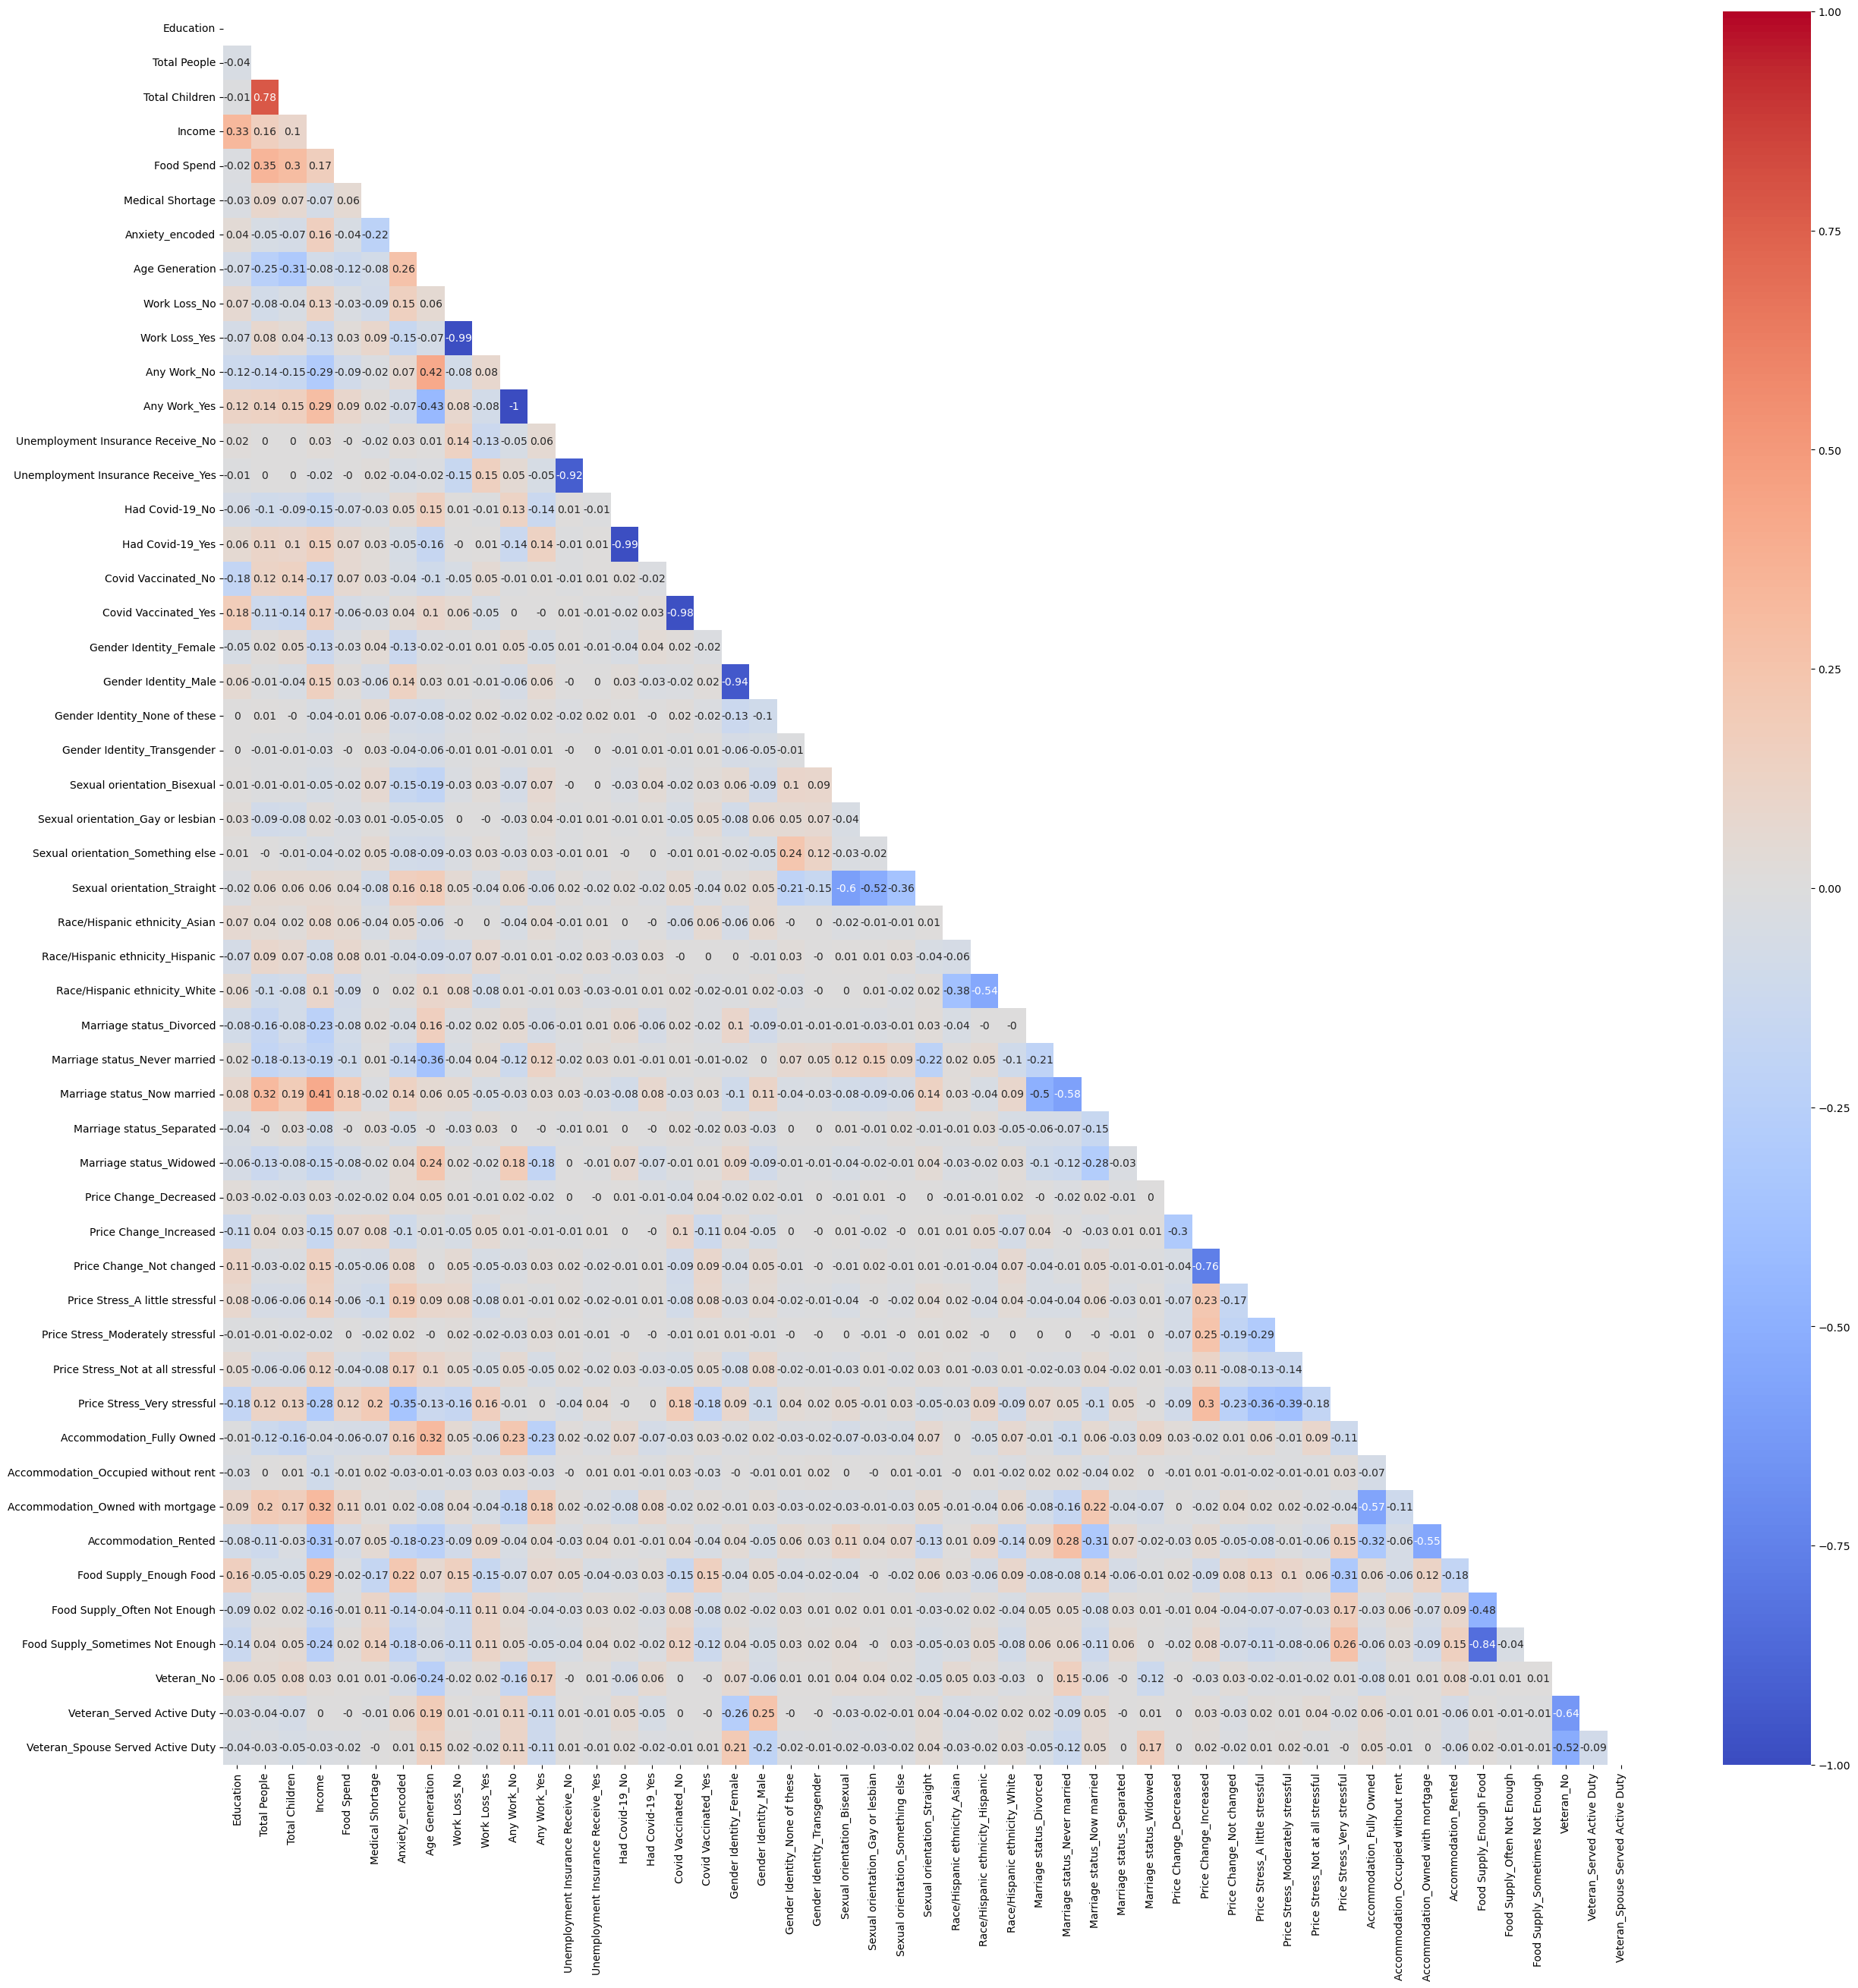

In [97]:
#Visualize the correlation
corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:
With a threshold set at 0.5, numerous feature pairs exhibit high collinearity. To mitigate this, certain features should be dropped. The criteria for feature removal are as follows:

- For binary features, drop 'No' as 'Yes' typically exhibits a stronger relationship with the target columns.

- For dummy variables, eliminate the one with fewer counts (as identified in Sprint 1 EDA notebook) or the one demonstrating higher collinearity with other features.
    
<div>


In [98]:
# drop columns
df.drop(columns = ['Work Loss_No','Any Work_No','Unemployment Insurance Receive_No','Covid Vaccinated_No','Gender Identity_Male'],inplace=True)

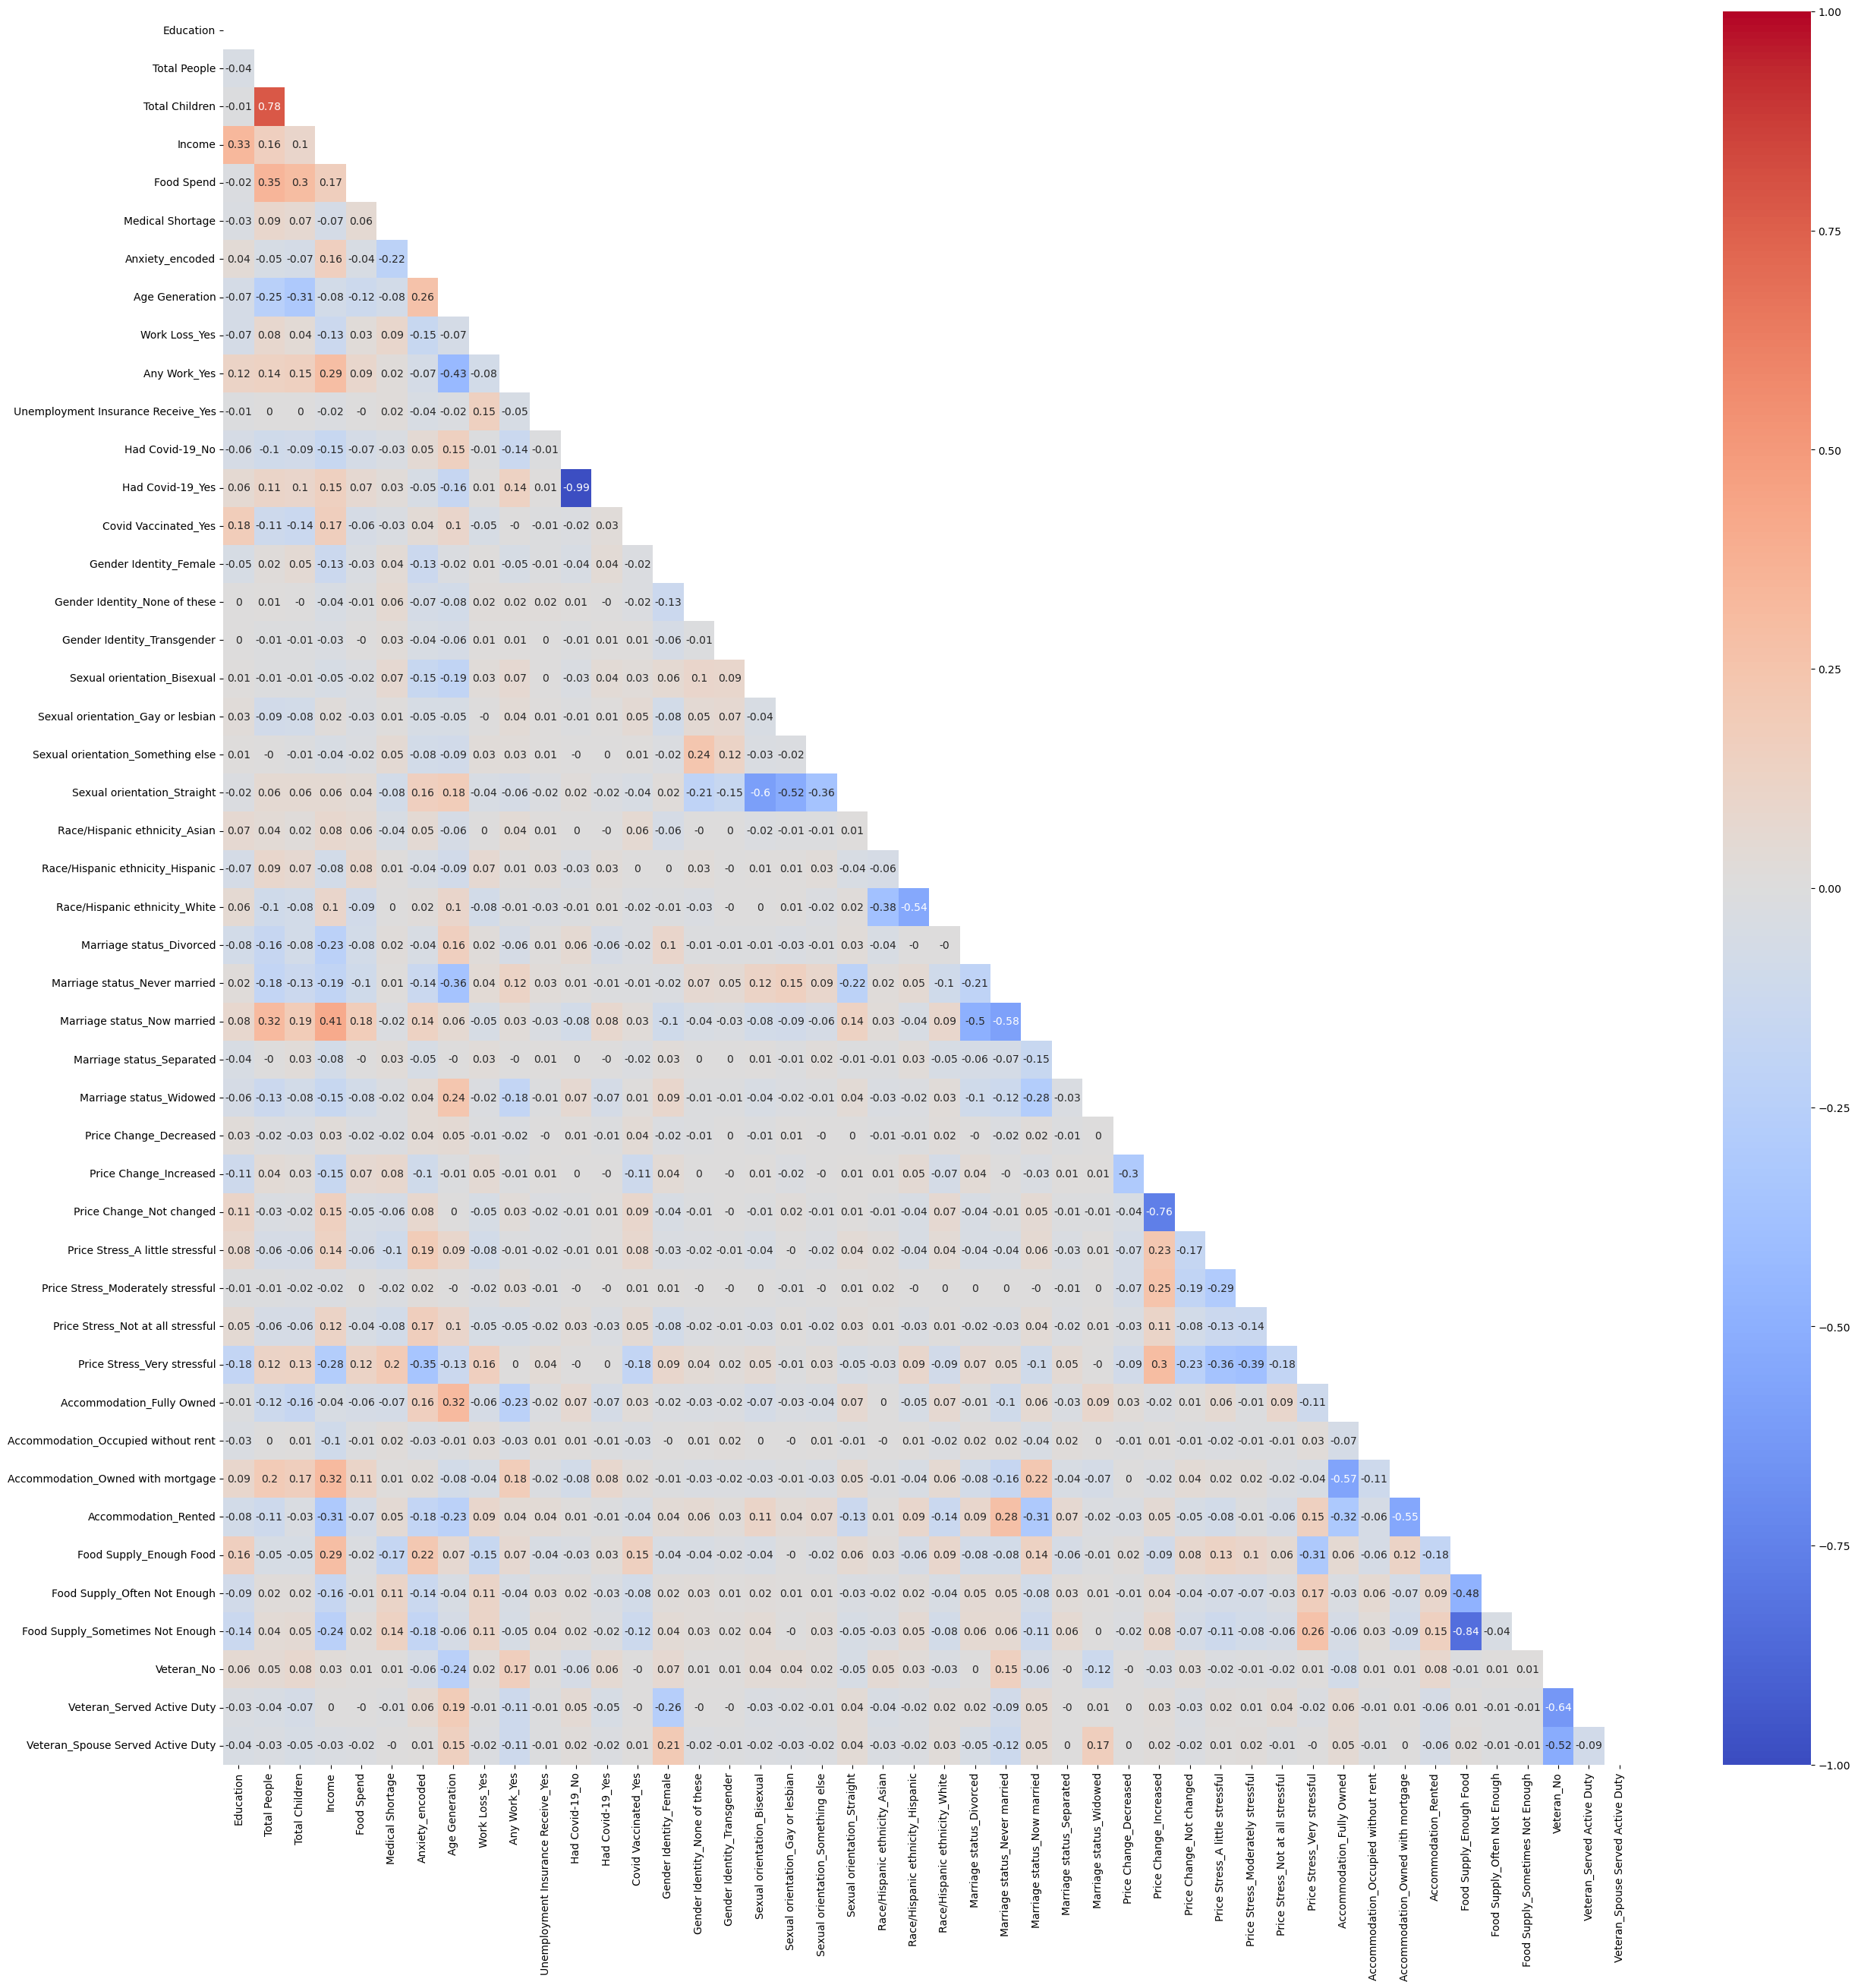

In [99]:
#visualize
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [100]:
#keep dropping
df.drop(columns = ['Total People','Had Covid-19_No','Price Change_Not changed','Food Supply_Sometimes Not Enough'],inplace=True)

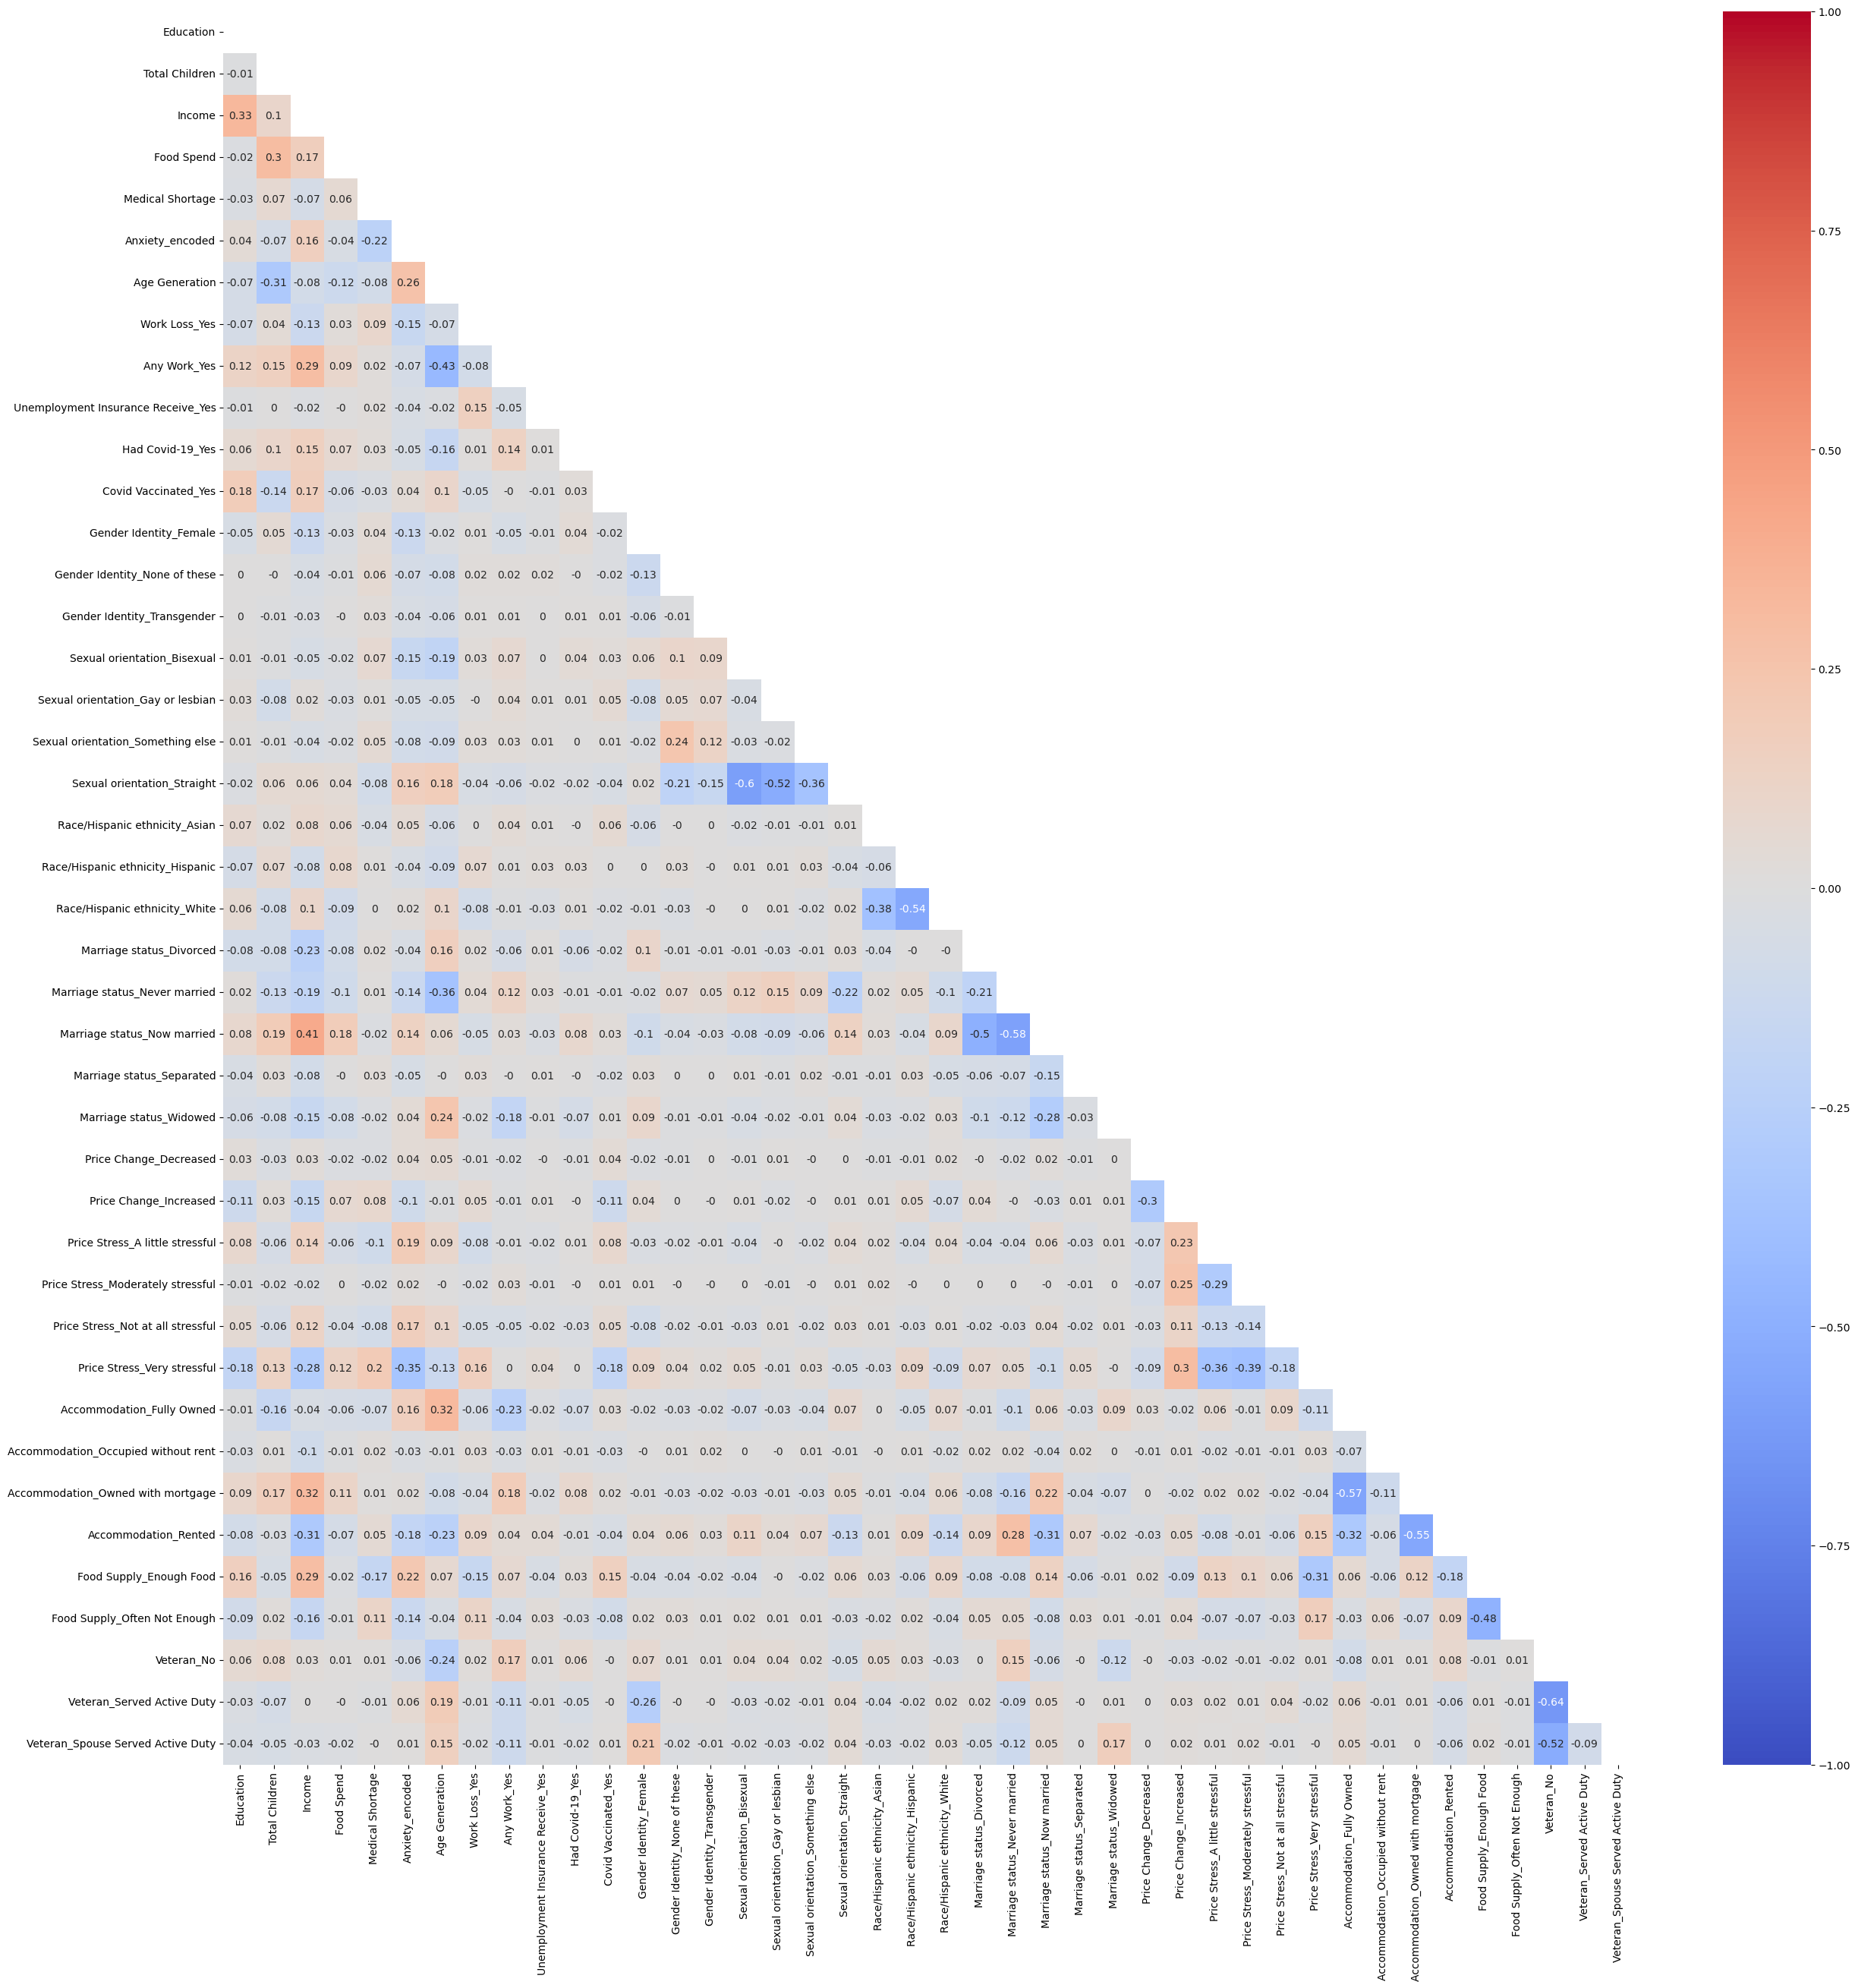

In [101]:
#visualize
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [102]:
#keep dropping
df.drop(columns = ['Sexual orientation_Straight','Marriage status_Now married','Veteran_No'],inplace=True)

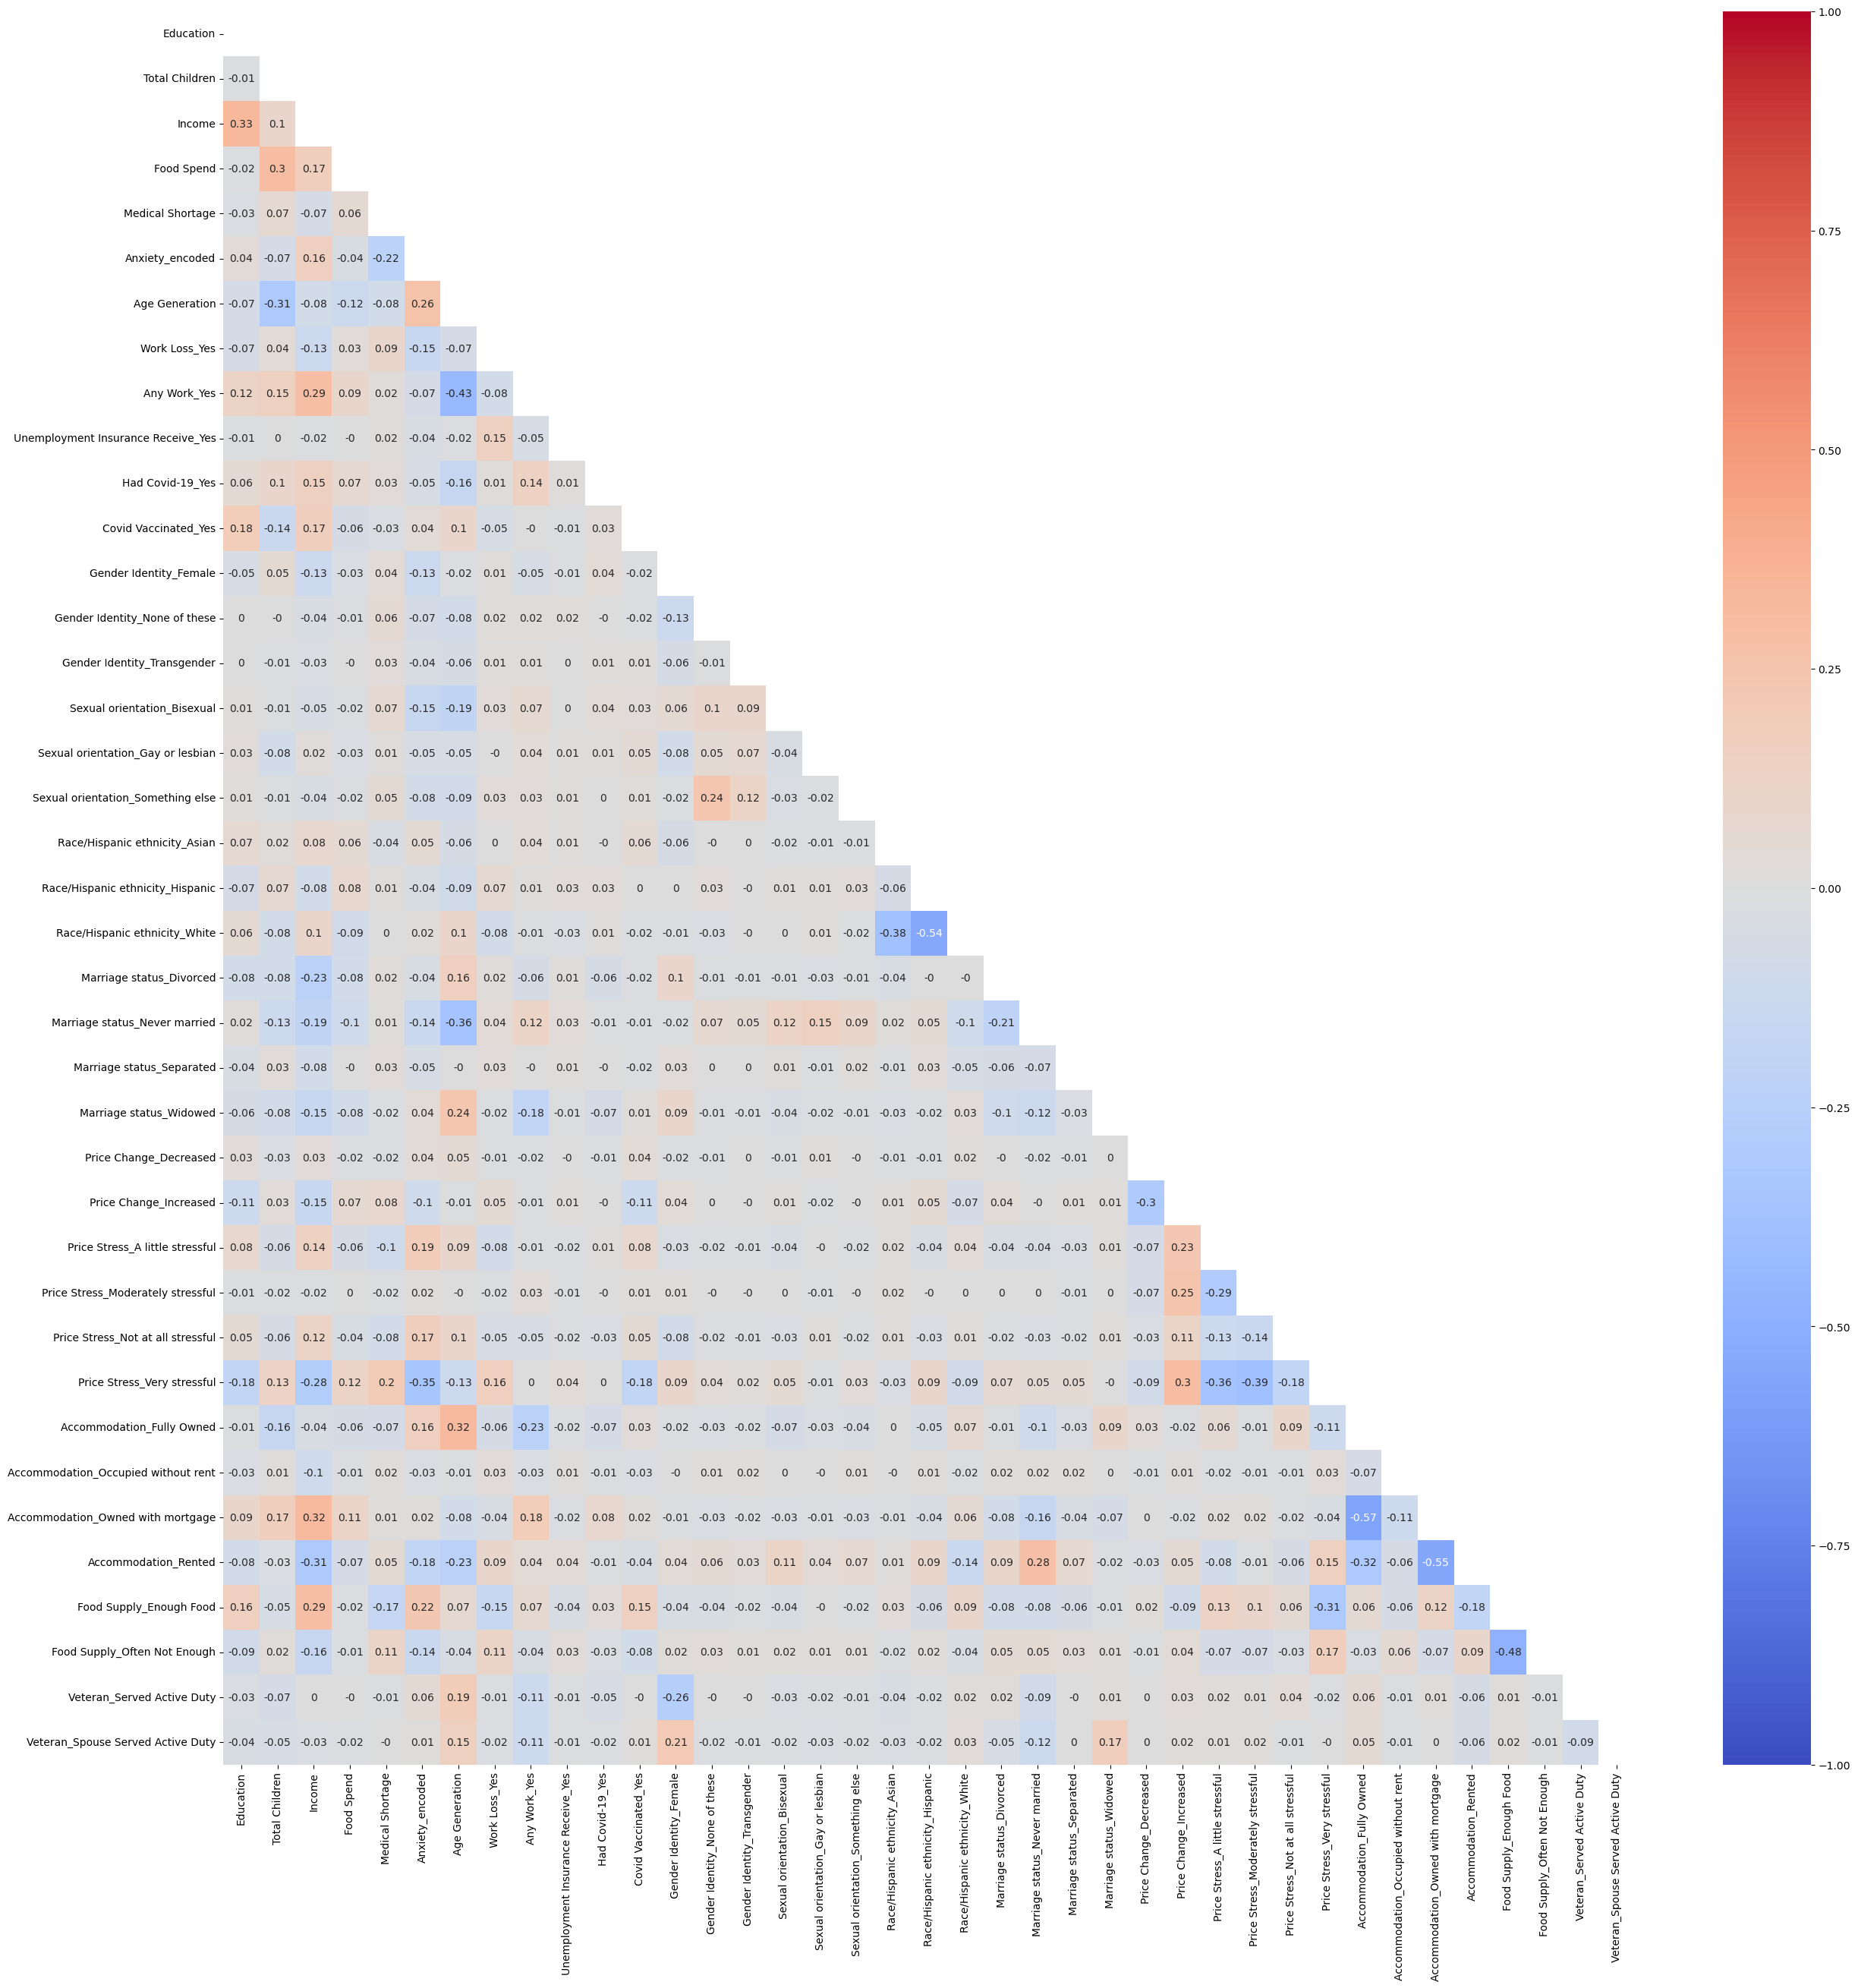

In [103]:
#visualize
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [104]:
#keep dropping
df.drop(columns = ['Accommodation_Owned with mortgage','Race/Hispanic ethnicity_White'],inplace=True)

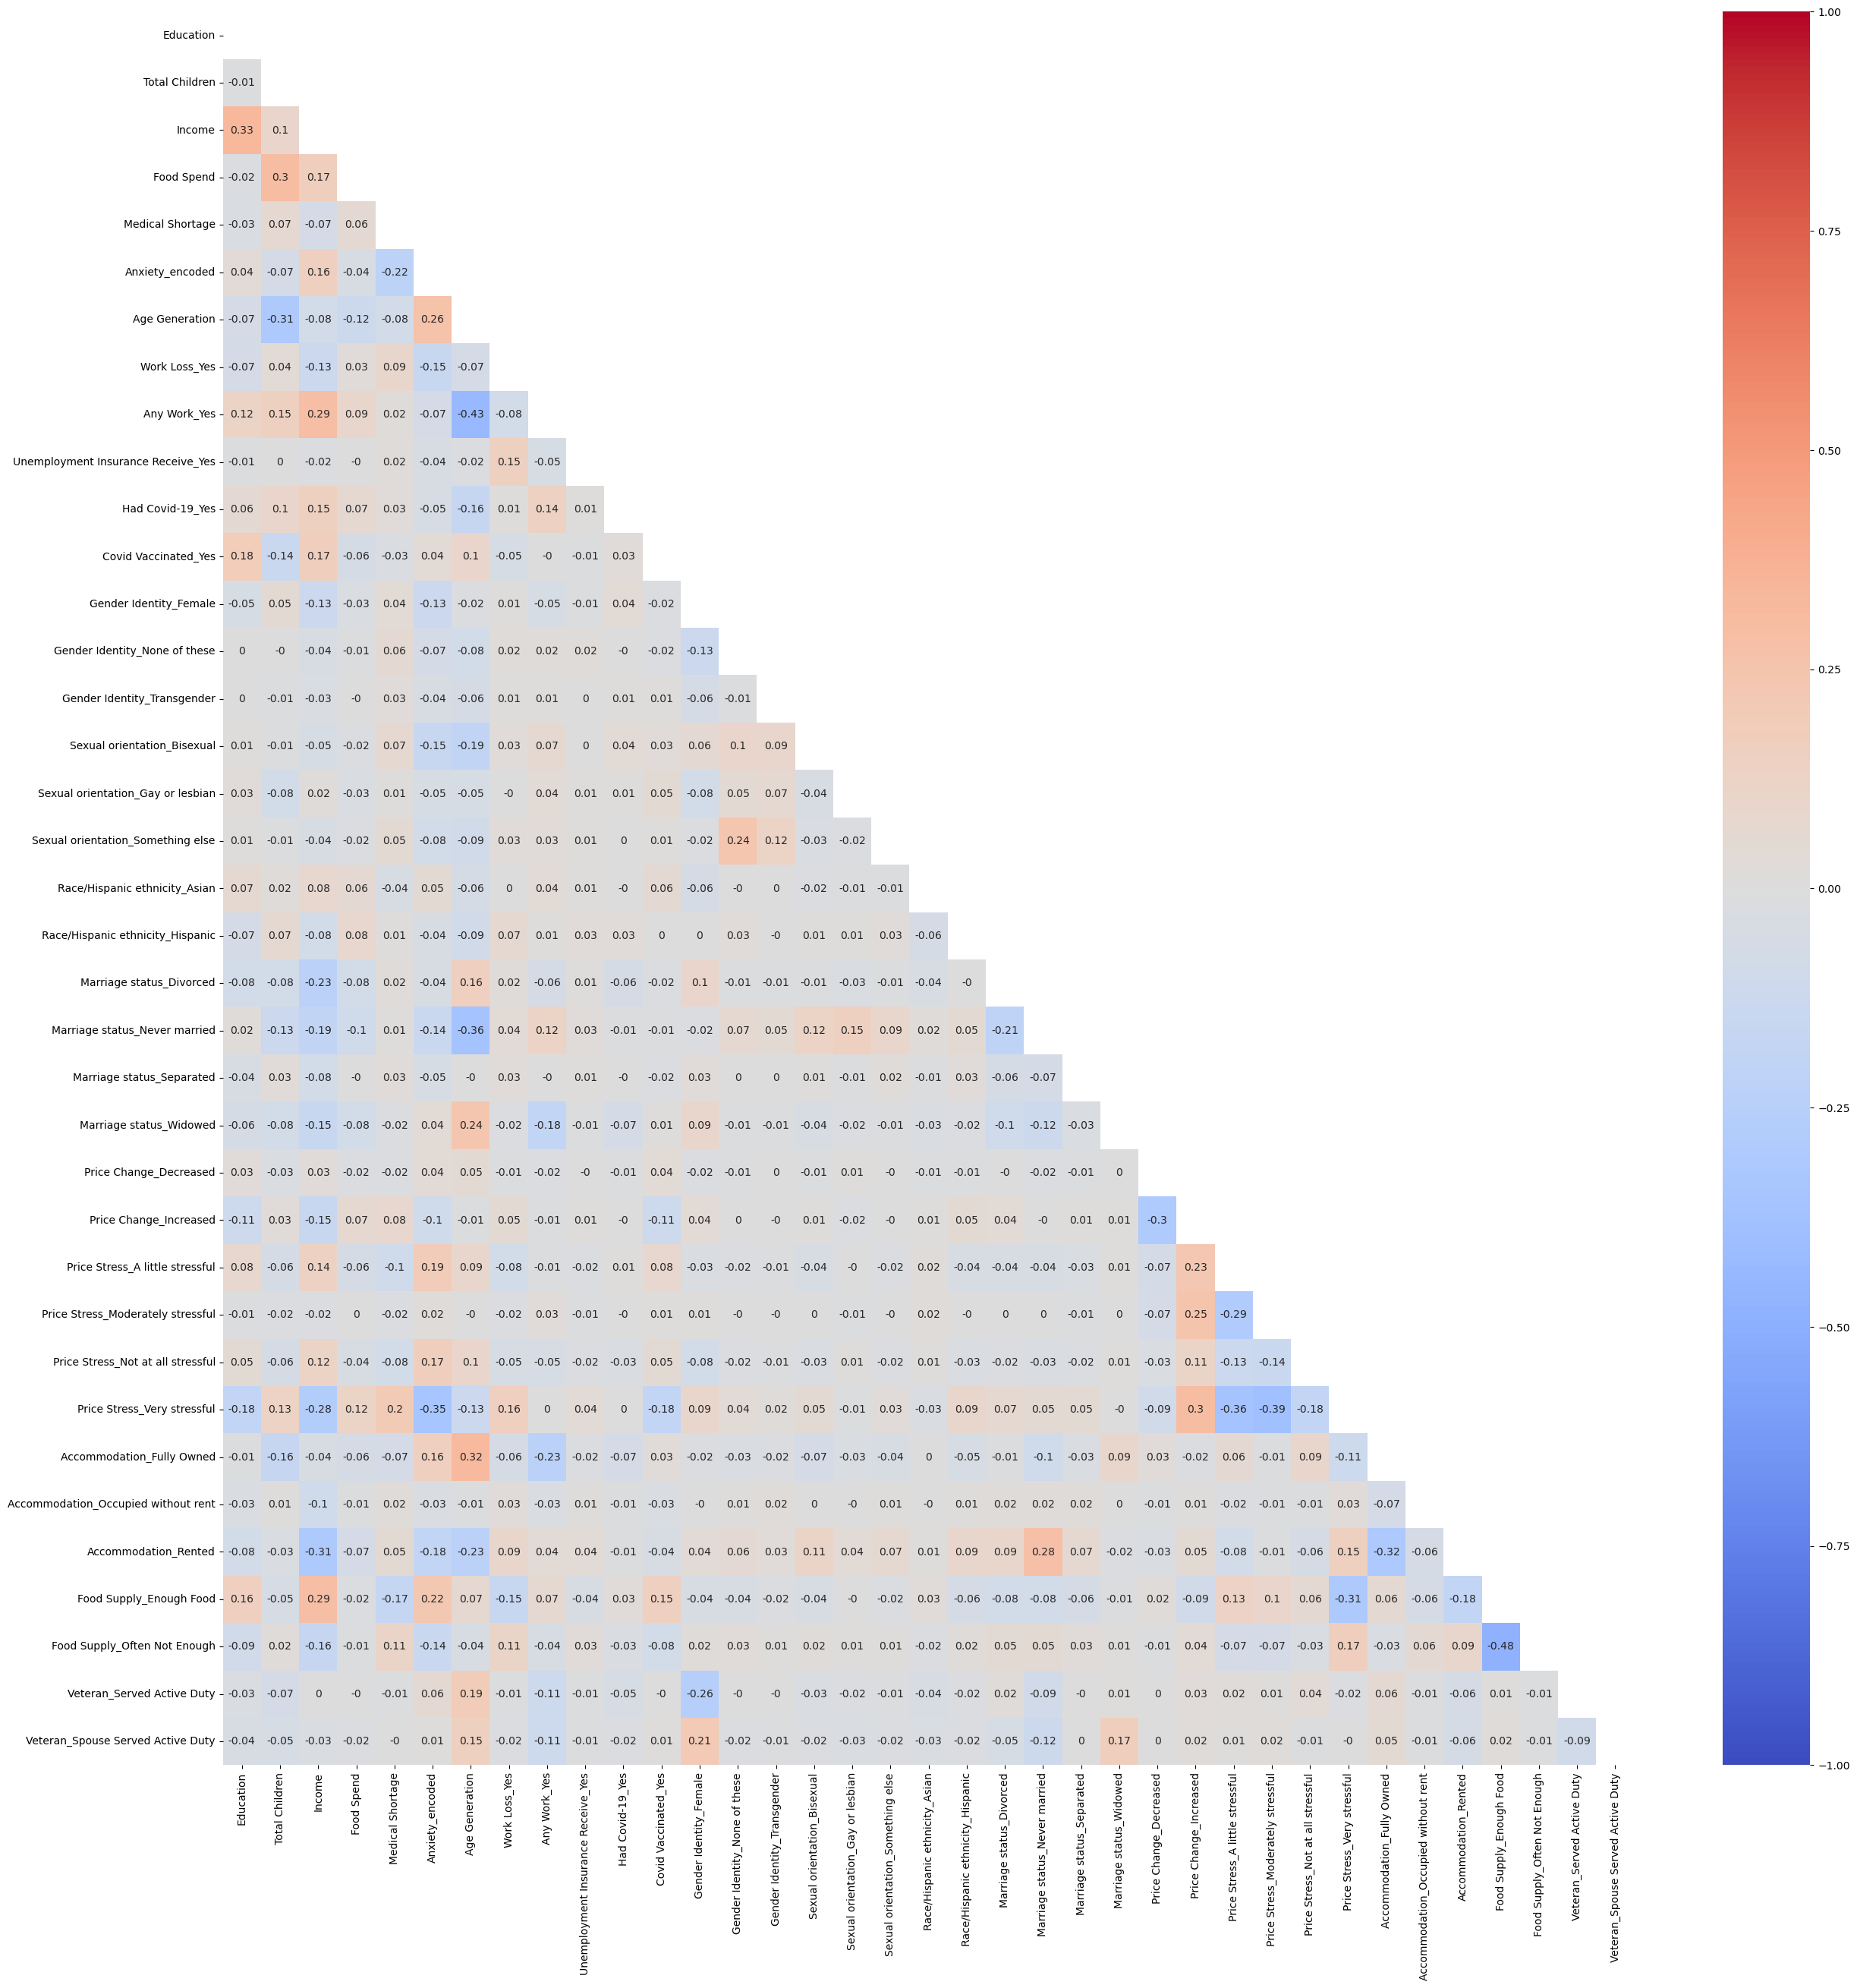

In [105]:
#visualize
X = df.drop(columns ='Depression_encoded')
y = df['Depression_encoded']

corr_df = X.corr()

mask = np.triu(corr_df)

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

In [106]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total Children                       54584 non-null  int64  
 2   Income                               54584 non-null  float64
 3   Food Spend                           54584 non-null  float64
 4   Medical Shortage                     54584 non-null  int64  
 5   Depression_encoded                   54584 non-null  int64  
 6   Anxiety_encoded                      54584 non-null  int64  
 7   Age Generation                       54584 non-null  float64
 8   Work Loss_Yes                        54584 non-null  int64  
 9   Any Work_Yes                         54584 non-null  int64  
 10  Unemployment Insurance Receive_Yes   54584 non-null  int64  
 11  Had Covid-19_Yes            

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:Great! Now, after removing features with high collinearity, we are left with 38 independent variables, all set for modeling.
<div>

### **Part 3 Multinomial Logistic Regression**

#### 3.1 Baseline Model

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


In [108]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)


# Print the accuracy
print(f"Accuracy: {accuracy:}")

Accuracy: 0.6876431254007511


In [109]:
print(f'Train Score: {model.score(X_train, y_train)}')
print(f'Test Score: {model.score(X_test, y_test)}')

Train Score: 0.6849108022076167
Test Score: 0.6876431254007511


<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:This represents the baseline model's performance with a training accuracy of approximately 68.49% and a testing accuracy of about 68.76%. These scores serve as a starting point for comparison and improvement.
<div>

#### **3.2 Apply Scaler**

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:

# Instantiate and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Score
print(f'Train Score: {model.score(X_train_scaled, y_train)}')
print(f'Test Score: {model.score(X_test_scaled, y_test)}')

Train Score: 0.7091854260654499
Test Score: 0.710726390033892


<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:After applying feature scaling, the model's performance has shown improvement. The training accuracy now stands at approximately 70.92%, and the testing accuracy at about 71.07%. This enhancement suggests that scaling the features has positively impacted the model's ability to generalize to unseen data.
<div>

#### **3.3 PCA**

In [44]:
# PCA import statement
from sklearn.decomposition import PCA

# Instantiate & fit PCA model
my_PCA = PCA()
my_PCA.fit(X_train_scaled)

# transform data 
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [45]:
print(f"Variance captured by PC1: {my_PCA.explained_variance_[0]: 0.3f}")
print(f"Variance captured by PC2: {my_PCA.explained_variance_[1]: 0.3f}")

print(f"Proportion of variance captured by PC1: {my_PCA.explained_variance_ratio_[0]: 0.3f}")
print(f"Proportion of variance captured by PC2: {my_PCA.explained_variance_ratio_[1]: 0.3f}")

Variance captured by PC1:  3.104
Variance captured by PC2:  2.438
Proportion of variance captured by PC1:  0.084
Proportion of variance captured by PC2:  0.066


In [47]:
X_train_PCA.shape

(43667, 37)

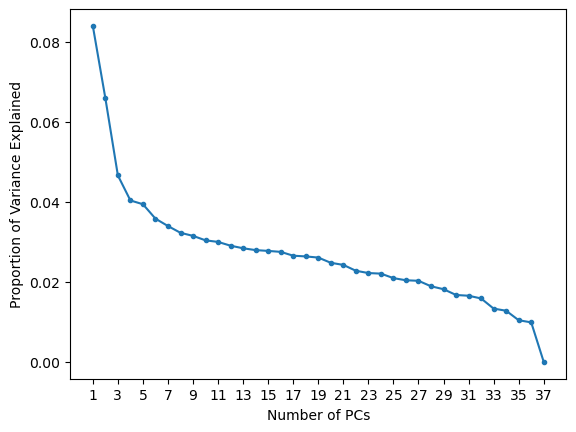

In [48]:
expl_var = my_PCA.explained_variance_ratio_

plt.figure()
plt.plot(range(1,X_train_PCA.shape[1]+1),expl_var,marker='.')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,X_train_PCA.shape[1]+1,2))
plt.show()

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:The visualization of the explained variance ratio indicates that when the number of principal components (n) is set to 4, it achieves the optimal balance in capturing relevant information from the data. This choice of n results in a clear and significant drop in the explained variance ratio, suggesting that 4 principal components adequately represent the underlying patterns in the data while avoiding unnecessary complexity.
<div>

In [49]:
# Instantiate and fit
my_PCA = PCA(n_components = 4)
my_PCA.fit(X_train_scaled)

# Transform train and test
X_train_PCA = my_PCA.transform(X_train_scaled)
X_test_PCA = my_PCA.transform(X_test_scaled)

In [51]:
# Let's use all the default parameters for now
log_model_pca = LogisticRegression()

# Fitting to original data
log_model_pca.fit(X_train_PCA,y_train)

# Scoring on original train and test sets
print(f'Train Score: {log_model_pca.score(X_train_PCA, y_train)}')
print(f'Test Score: {log_model_pca.score(X_test_PCA, y_test)}')

Train Score: 0.5965145304234318
Test Score: 0.6079509022625263


<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:After applying Principal Component Analysis (PCA), the model's performance shows a decrease compared to the previous scores. The train score drops to 0.5965, and the test score decreases to 0.6079. This reduction in accuracy may be attributed to the dimensionality reduction introduced by PCA, suggesting that the information retained by the reduced set of features might not be as conducive to predictive modeling in this context.
<div>

- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.76% |
| 2 | Logistic Regression - After Scaling                        | 71.07% |
| 3 | Logistic Regression - After Scaling & PCA                       | 60.8% |


#### **3.4 Parameter Tuning**

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

estimators = [
    ('scaler',StandardScaler()),
    ('model',LogisticRegression())
]

pipe = Pipeline(estimators)

# set the optional values for three parameters
param_grid = [
    {
        'scaler':[StandardScaler()],
        'model':[LogisticRegression()],
        'model__solver':['lbfgs', 'liblinear', 'saga'],
        'model__C':[0.001, 0.01, 0.1, 1, 10, 100],
        'model__penalty': ['l1', 'l2']
    }
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5,verbose=2)


fittedgrid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.1s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=lbfgs, scaler=StandardScaler(); total time=   0.0s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=liblinear, scaler=StandardScaler(); total time=   0.3s
[CV] END model=LogisticRegression(), model__C=0.001, model__penalty=l1, model__solver=liblinear, scaler=Standard

In [58]:
fittedgrid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.01, penalty='l1', solver='saga'))])

In [59]:
# Best hyperparameters
fittedgrid.best_params_

{'model': LogisticRegression(C=0.01, penalty='l1', solver='saga'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'model__solver': 'saga',
 'scaler': StandardScaler()}

In [61]:
fittedgrid.best_score_

0.7072847240178314

In [60]:
#get the test_score using the best parameters
test_score = fittedgrid.score(X_test,y_test)
test_score

0.7124667949070257

- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.76% |
| 2 | Logistic Regression - After Scaling                        | 71.07% |
| 3 | Logistic Regression - After Scaling & PCA                       | 60.8% |
| 4 | Logistic Regression - Scaling & Hyperparameter                     | 71.25% |

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:
The table summarizes the accuracy rates for various models at different stages of enhancement. The Logistic Regression baseline model achieved an accuracy rate of 68.76%. After scaling the features, the accuracy improved to 71.07%, highlighting the positive impact of feature scaling. However, the introduction of Principal Component Analysis (PCA) led to a decline in accuracy to 60.8%, indicating that the reduced feature set might not capture essential patterns as effectively. Finally, incorporating both scaling and hyperparameter tuning resulted in a slight accuracy improvement, reaching 71.25%. These findings underscore the iterative nature of model refinement, with each step influencing the overall predictive performance.
<div>

#### **3.5 Model Evaluation**

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred = best_model.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels based on your specific problem
class_labels = ['Class 1', 'Class 2', 'Class 3']  # Replace with your actual class labels

# Create a DataFrame with labeled rows and columns
cf_df = pd.DataFrame(cf_matrix, columns=class_labels, index=class_labels)

# Display the confusion matrix
display(cf_df)


Class 1  Class 2  Class 3
Class 1     1042      522      135
Class 2      531     1698     1104
Class 3      115      732     5038

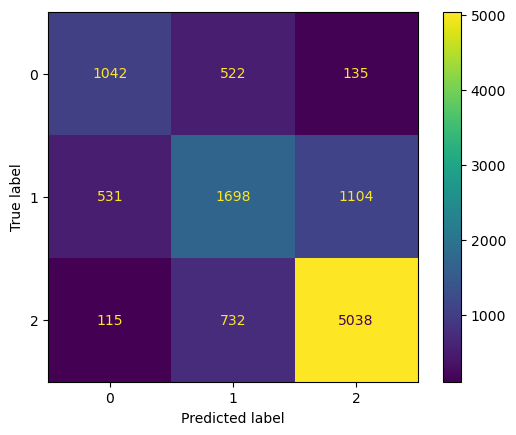

In [66]:
# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(best_model,X_test, y_test)

**Classification_report**

In [67]:
from sklearn.metrics import classification_report
report_initial = classification_report(y_test,y_pred)

print(report_initial)

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1699
           1       0.58      0.51      0.54      3333
           2       0.80      0.86      0.83      5885

    accuracy                           0.71     10917
   macro avg       0.67      0.66      0.66     10917
weighted avg       0.70      0.71      0.71     10917



<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:
The classification report offers a comprehensive evaluation of the model's performance across three classes: Major Depression (Class 0), Mild Depression (Class 1), and No Depression (Class 2). The precision, recall, and F1-score metrics provide insights into the accuracy of predictions for each class.

Specifically, the model demonstrates robust performance in identifying instances of No Depression (Class 2), with high precision, recall, and F1-score values. However, there's room for improvement in predicting Major Depression (Class 0) and Mild Depression (Class 1), where the precision and recall values are relatively lower. The overall accuracy of 71% reflects a moderate level of model performance. Future enhancements could focus on addressing the imbalances in precision and recall for the different depression classes.
<div>

### **Part 4 Random Forest** 

<div style="border-radius:10px; border: #B0E0E6 solid; padding: 15px; background-color: #F0F8FF; font-size:100%; text-align:left">
<font size="2px" color="#000000"> 
    <b>Comment</b>:Given the robustness of Random Forest in handling collinearity, the dataset used for this model retains features based on their statistical significance (features with high p-values are dropped), without addressing high collinearity. Additionally, since the previous attempt with Principal Component Analysis (PCA) did not yield substantial benefits in the logistic regression model, PCA will not be applied in this context. The notebook explores two Random Forest models: a baseline model and a model with hyperparameter tuning to optimize its performance.
<div>

#### **4.1 Data Preprocessing**

In [79]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model (you can use different metrics)
accuracy_rf = rf_classifier.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.7029403682330311


In [68]:
df2 = pd.read_csv('/Users/kouyuyang/Brainstation/Capstone/Sprint 2/Feature Engineering Data.csv')

df2.head()  

Education  Total People  Total Children  Income  Food Spend  \
0        4.0             2               0     7.0       200.0   
1        3.0             1               0     4.0       200.0   
2        4.0             1               0     6.0        65.0   
3        2.0             4               1     0.0       200.0   
4        4.0             2               0     6.0       300.0   

   Medical Shortage  Depression_encoded  Anxiety_encoded  Age Generation  \
0                 0                   0                1             1.0   
1                 0                   0                0             3.0   
2                 0                   1                1             1.0   
3                 0                   2                2             2.0   
4                 0                   0                0             1.0   

   Work Loss_No  ...  Accommodation_Rented  Food Supply_Enough Food  \
0             1  ...                     0                        1   
1             0  ...                     0                        1   
2             1  ...                     0                        1   
3             1  ...                     1                        0   
4             1  ...                     1                        1   

   Food Supply_Often Not Enough  Food Supply_Sometimes Not Enough  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 1   
4                             0                                 0   

   Active Duty_No  Active Duty_On Active Duty  \
0               1                           0   
1               1                           0   
2               1                           0   
3               1                           0   
4               1                           0   

   Active Duty_Spouse On Active Duty  Veteran_No  Veteran_Served Active Duty  \
0                                  0           1                           0   
1                                  0           1                           0   
2                                  0           1                           0   
3                                  0           1                           0   
4                                  0           1                           0   

   Veteran_Spouse Served Active Duty  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 56 columns]

In [73]:
X2 = df2.drop(columns ='Depression_encoded')
y2 = df2['Depression_encoded']

In [70]:
df2.drop(columns=['Race/Hispanic ethnicity_Black','Active Duty_No','Active Duty_On Active Duty','Active Duty_Spouse On Active Duty'],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Education                            54584 non-null  float64
 1   Total People                         54584 non-null  int64  
 2   Total Children                       54584 non-null  int64  
 3   Income                               54584 non-null  float64
 4   Food Spend                           54584 non-null  float64
 5   Medical Shortage                     54584 non-null  int64  
 6   Depression_encoded                   54584 non-null  int64  
 7   Anxiety_encoded                      54584 non-null  int64  
 8   Age Generation                       54584 non-null  float64
 9   Work Loss_No                         54584 non-null  int64  
 10  Work Loss_Yes                        54584 non-null  int64  
 11  Any Work_No                 

In [72]:
X2 = df2.drop(columns ='Depression_encoded')
y2 = df2['Depression_encoded']

In [77]:
# Split your data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#### **4.2 Baseline Model**

In [78]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate and fit the Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X2_train, y2_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X2_test)

# Evaluate the model (you can use different metrics)
accuracy_rf = rf_classifier.score(X2_test, y2_test)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.7034899697719154


#### **4.3 Hyperparameter Tunning**

In [80]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}


In [82]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search on the training data
grid_search.fit(X2_train, y2_train)

# Get the best model with optimal hyperparameters
best_model = grid_search.best_estimator_


NameError: name 'y2_pred' is not defined

In [85]:
# Predict on the test data using the best model
y_pred = best_model.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(y2_test, y_pred)
print(f"Random Forest Tuned Accuracy: {accuracy}")

Random Forest Tuned Accuracy: 0.7166804067051388


- **Model Assessment with Accuracy Rate** <br>
    
| Model | Variables                                  | Accuracy Rate    |
|-------|--------------------------------------------|-------|
| 1 | Logistic Regression  - Baseline model                                        | 68.76% |
| 2 | Logistic Regression - After Scaling                        | 71.07% |
| 3 | Logistic Regression - After Scaling & PCA                       | 60.8% |
| 4 | Logistic Regression - Scaling & Hyperparameter                     | 71.25% |
| 5 | Random Forest - Baseline Model                    | 70.35% |
| 6 | Random Forest - Hyperparameter Tunning                     | 71.67% |